In [183]:
## Project setup 
# (Code run in a virtual env.)
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [184]:
## Data Loading
df = pd.read_csv('robot_inverse_kinematics_dataset.csv')
print(df.shape)
print(df.dtypes)

df.head()


(15000, 9)
q1    float64
q2    float64
q3    float64
q4    float64
q5    float64
q6    float64
x     float64
y     float64
z     float64
dtype: object


q1     q2    q3     q4      q5     q6       x       y      z
0 -1.51 -0.763  1.85 -0.817  0.9120  2.320 -0.0947  0.1500  0.301
1 -2.84  0.520  1.58 -1.270 -1.3900  0.617  0.1420 -0.1000  0.225
2 -1.23  0.695  1.22 -1.130  0.0343  6.270 -0.0833  0.2230  0.206
3 -1.99  1.060  1.74 -1.760 -1.2400  4.760  0.1350 -0.0314  0.370
4  1.05  0.836  1.34 -1.890  0.4840  4.380 -0.0560 -0.2290  0.260

In [185]:
## Data preperation
df.isna().mean().sort_values(ascending=False) # checks for missing data
df.isna().sum()
df.loc[df.duplicated()] # shows duplicates
df.head(5)

q1     q2    q3     q4      q5     q6       x       y      z
0 -1.51 -0.763  1.85 -0.817  0.9120  2.320 -0.0947  0.1500  0.301
1 -2.84  0.520  1.58 -1.270 -1.3900  0.617  0.1420 -0.1000  0.225
2 -1.23  0.695  1.22 -1.130  0.0343  6.270 -0.0833  0.2230  0.206
3 -1.99  1.060  1.74 -1.760 -1.2400  4.760  0.1350 -0.0314  0.370
4  1.05  0.836  1.34 -1.890  0.4840  4.380 -0.0560 -0.2290  0.260

Text(0, 0.5, 'Joint angles')

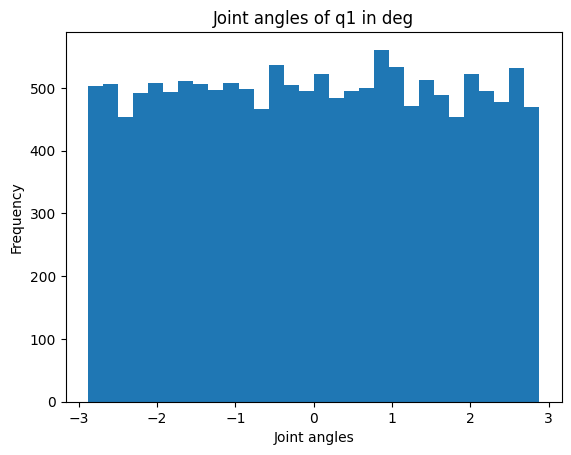

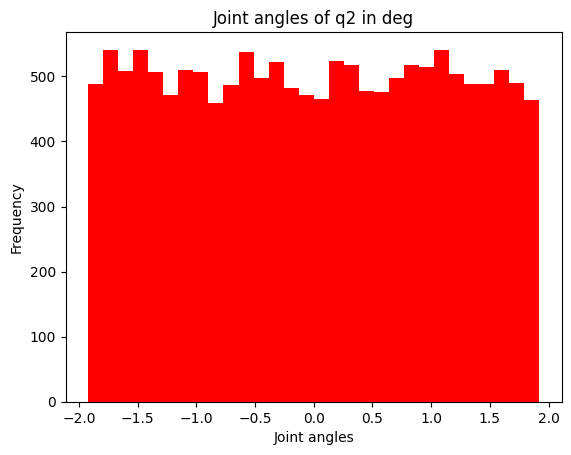

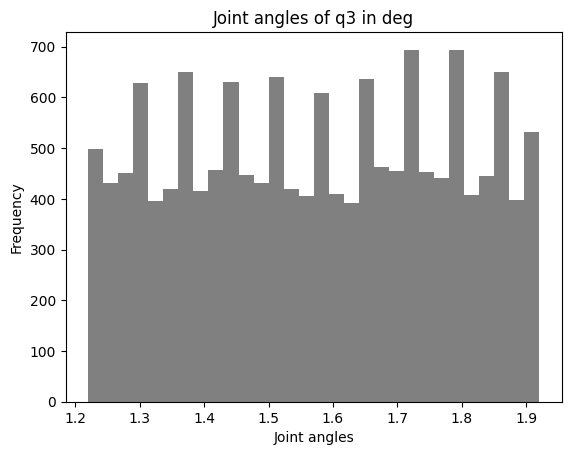

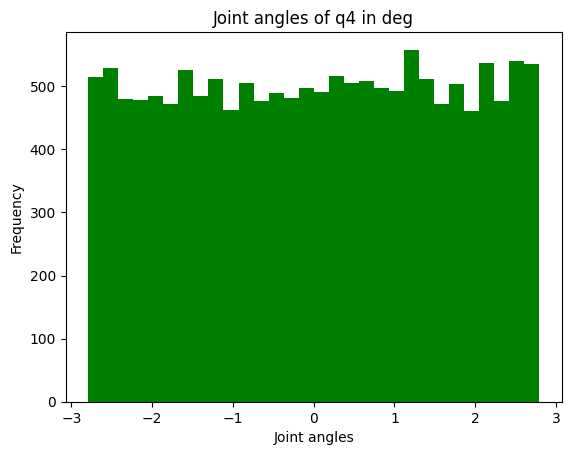

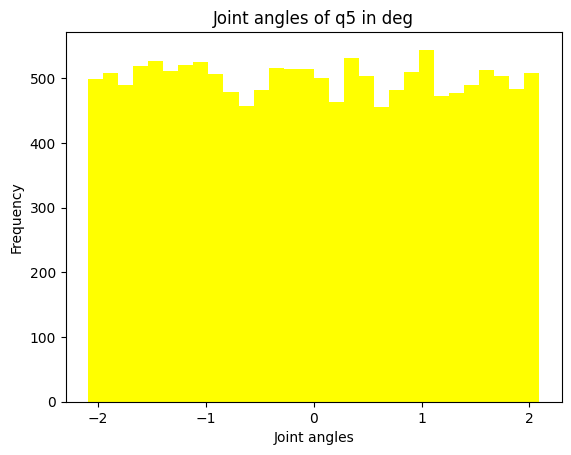

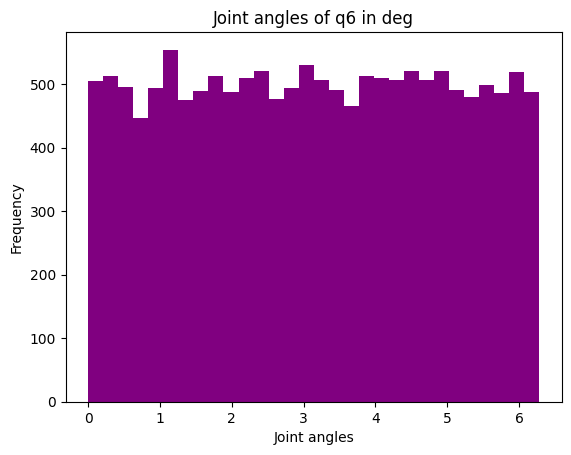

<Figure size 640x480 with 0 Axes>

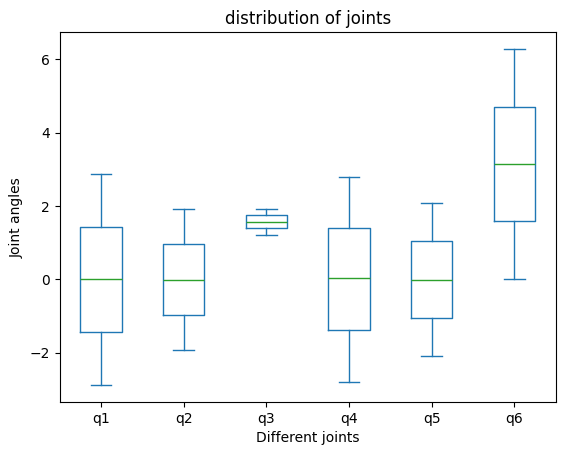

In [ ]:
## Feature Understanding; getting to know what each column represents
plt.figure()
a = df['q1'].plot(kind = 'hist', bins = 30, title = 'Joint angles of q1 in rad')
a.set_xlabel('Joint angles')

plt.figure()
a = df['q2'].plot(kind = 'hist', bins = 30, title = 'Joint angles of q2 in rad', color = 'red')
a.set_xlabel('Joint angles')

plt.figure()
a = df['q3'].plot(kind = 'hist', bins = 30, title = 'Joint angles of q3 in rad', color = 'grey')
a.set_xlabel('Joint angles')

plt.figure()
a = df['q4'].plot(kind = 'hist', bins = 30, title = 'Joint angles of q4 in rad', color = 'green')
a.set_xlabel('Joint angles')

plt.figure()
a = df['q5'].plot(kind = 'hist', bins = 30, title = 'Joint angles of q5 in rad', color = 'yellow')
a.set_xlabel('Joint angles')

plt.figure()
a = df['q6'].plot(kind = 'hist', bins = 30, title = 'Joint angles of q6 in rad', color = 'purple')
a.set_xlabel('Joint angles')

plt.figure()
a = df[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']].plot(kind = 'box', title = 'distribution of joints')
a.set_xlabel('Different joints')
a.set_ylabel('Joint angles')


In [ ]:
df.describe()

q1            q2            q3            q4            q5  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.000015     -0.000160      0.027444      0.000325     -0.000164   
std        0.028886      0.019384      0.003520      0.028272      0.021138   
min       -0.050265     -0.033510      0.021293     -0.048695     -0.036477   
25%       -0.024958     -0.017091      0.024435     -0.024086     -0.018500   
50%        0.000120     -0.000178      0.027402      0.000675     -0.000368   
75%        0.024784      0.016703      0.030543      0.024609      0.018151   
max        0.050265      0.033510      0.033510      0.048695      0.036477   

                 q6  
count  15000.000000  
mean       0.054861  
std        0.031596  
min        0.000008  
25%        0.027576  
50%        0.054978  
75%        0.082205  
max        0.109607

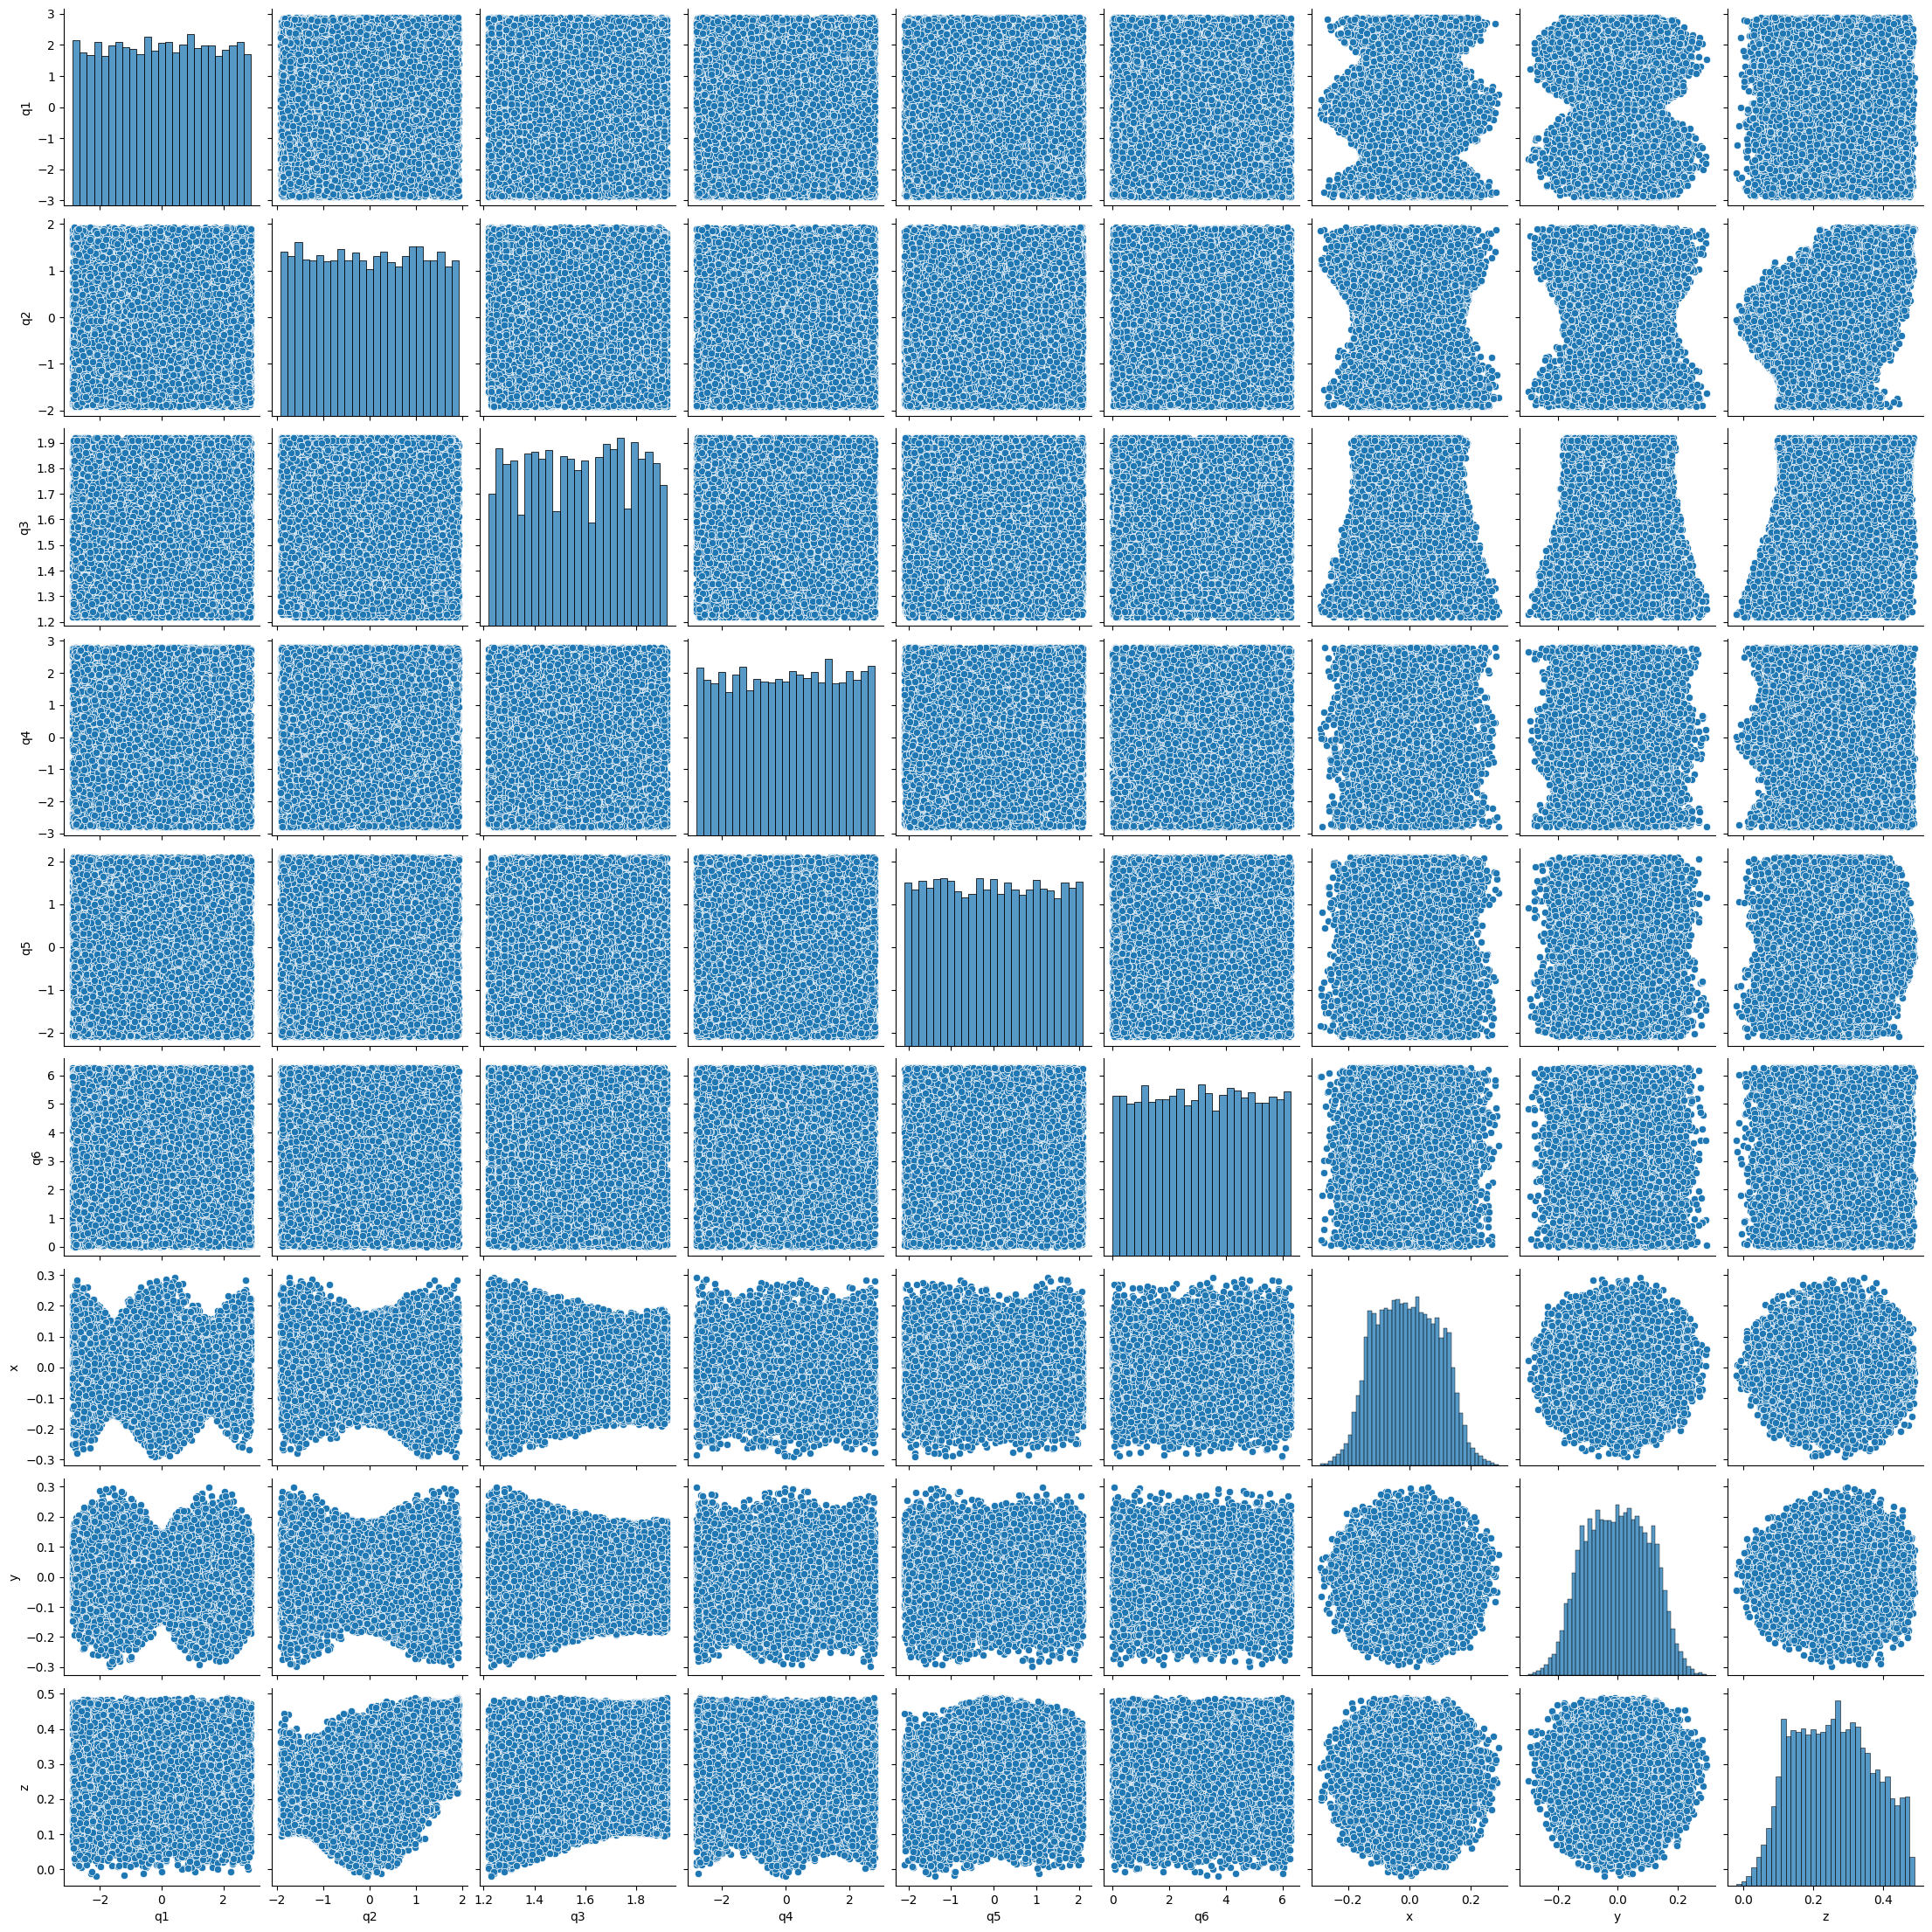

In [187]:
## Feature Relationships
sns.pairplot(df, vars = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'x', 'y', 'z'])
plt.show()

<Axes: >

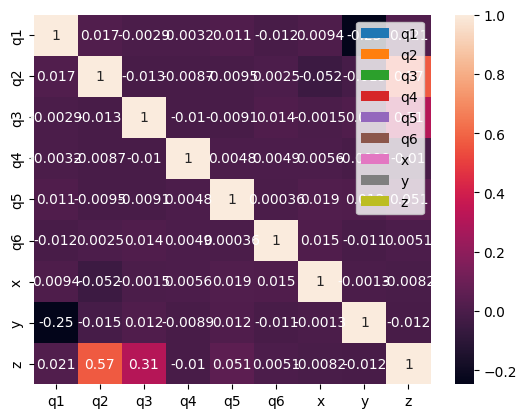

In [166]:
df_corr = df[['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'x', 'y', 'z']].corr()
df_corr.plot(kind = 'hist', bins = 30)
sns.heatmap(df_corr, annot = True)

In [ ]:
# RESEARCH QUESTION: WHICH JOINT ON A 6-DOF ROBOTIC ARM INFLUENCES THE X,Y,Z POSITION OF THE END EFFECTOR THE MOST?

# Hypothesis: The joint that is closest to the end effector will have the most influence on the position 
# of the end effector, meaning q6 will have the most influence.

<Axes: >

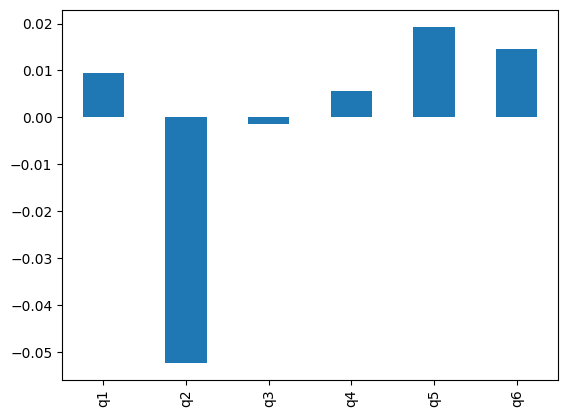

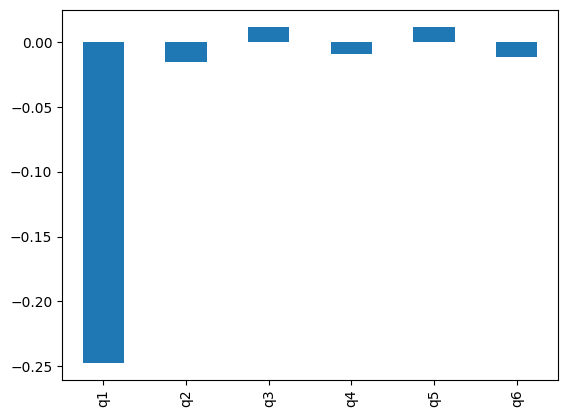

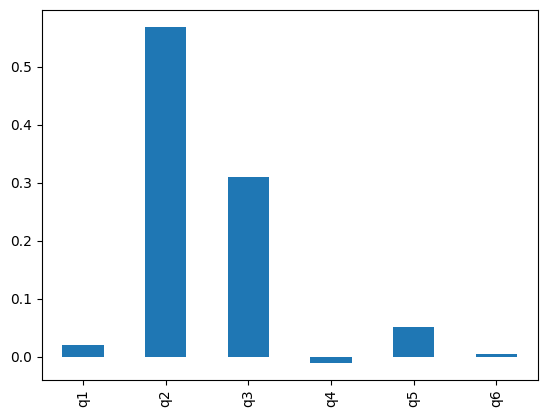

In [ ]:
# find correlation between each of the dimensions and joint angles
corr_x = df_corr['x'].loc[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']]
corr_y = df_corr['y'].loc[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']]
corr_z = df_corr['z'].loc[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']]

plt.figure()
corr_x.plot(kind = 'bar')

plt.figure()
corr_y.plot(kind = 'bar')

plt.figure()
corr_z.plot(kind = 'bar')

In [ ]:
abs_corr = df_corr.loc[['q1','q2','q3','q4','q5','q6'], ['x', 'y', 'z']].abs() # extracts the correlation between the joint angles and the x,y,z EE positions, .abs() gives magnitude
print(abs_corr)


           x         y         z
q1  0.009375  0.247352  0.020598
q2  0.052216  0.014787  0.568506
q3  0.001459  0.012059  0.308877
q4  0.005566  0.008898  0.010112
q5  0.019316  0.011501  0.051358
q6  0.014647  0.011294  0.005147


In [237]:
# sorts the correlation of joint angles for each dimension of EE
df_x = abs_corr[['x']].sort_values(by = ['x'], ascending = False)

df_y = abs_corr[['y']].sort_values(by = ['y'], ascending = False)

df_z = abs_corr[['z']].sort_values(by = ['z'], ascending = False)

df_x, df_y, df_z

(           x
 q2  0.052216
 q5  0.019316
 q6  0.014647
 q1  0.009375
 q4  0.005566
 q3  0.001459,
            y
 q1  0.247352
 q2  0.014787
 q3  0.012059
 q5  0.011501
 q6  0.011294
 q4  0.008898,
            z
 q2  0.568506
 q3  0.308877
 q5  0.051358
 q1  0.020598
 q4  0.010112
 q6  0.005147)

In [ ]:
## Conclusion and insights

# for the x dimension, q2 has the strongest correlation, for y it is q1 and z it is q2. 
# As a result, q2 appears to have the most impact on the EE end effector position.